In [1]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
from PIL import Image
!pip install opencv-python
import cv2

  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)


In [2]:
def ICV_rgb2gray(image):
    '''
    == Input ==
    image  : color image of shape (height, width)
    
    == Output ==  
    gray : Input image converted to grayscale image
    '''

    # r = image[:,:,0]
    # g= image[:,:,1]
    # b= image[:,:,2]
    gray = (0.2989 * image[:,:,0] + 0.5870 * image[:,:,1] + 0.1140 * image[:,:,2])//3
    # gray = np.mean(image, axis=2)

    return gray

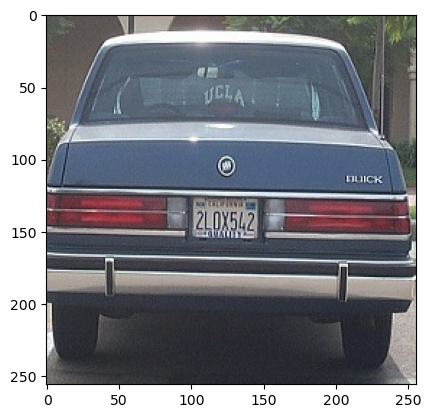

In [162]:
var1 = plt.imread('./Dataset/DatasetA/car-1.jpg')
plt.imshow(var1)

(256, 256)


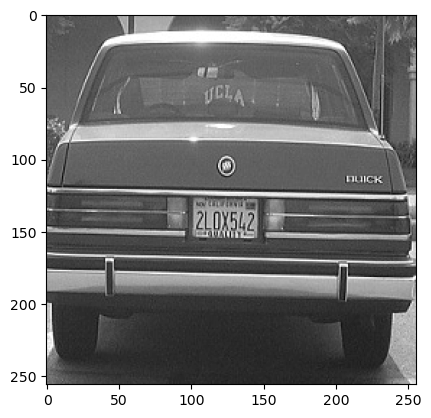

In [16]:
car = ICV_rgb2gray(var1)
print(car.shape)
plt.imshow(car, cmap = plt.cm.gray) 

In [5]:
def ICV_optimum_window(n):
    i = 2
    factors = []
    for i in range(1,n+1):
        
        if n % i == 0:
            
            factors.append(i)
    
    return factors
    
    


In [6]:
ICV_optimum_window(256) #Function returns the possible optimum window size 

[1, 2, 4, 8, 16, 32, 64, 128, 256]

In [7]:
def ICV_LBPval(img):
    '''
    == Input ==
    img  :  image of shape (height, width)
    
    == Output ==  
    val : decimal LBP converted value of a given input
    '''
    center = img[1,1]
    img01 = (img >= center)*1.0
    img01_vector = img01[0]
    img02_vector = np.delete(img01[:,2],0)
    img03_vector = np.delete(img01[2,:],2)
    img03 = img03_vector[::-1]
    img04 = np.delete(img01[:,0],[0,2])
    img05 = np.concatenate((img01_vector,img02_vector,img03,img04),axis=0)
    
    power_val = [128, 64, 32, 16, 8, 4, 2, 1]
    val = 0
    for i in range(len(img05)):
        val += int(img05[i] * power_val[i])
    return val

In [8]:
def ICV_padding_func(img,padding=1):
    '''
    == Input ==
    img  : image of shape (height, width)
    padding size: size of the padding needed
    
    == Output ==  
    zero : Resultant image after the required padding
    '''
    
    
    zero = np.zeros((img.shape[0]+2*padding, img.shape[1]+2*padding))

    zero[padding:img.shape[0]+padding, padding:img.shape[1]+padding] = img
    return zero

In [9]:

def ICV_window(gray_image,window_size):
    '''
    == Input ==
    gray_image  : grayscale image of shape (height, width)
    window size: size of the windows (w*w)
    
    == Output ==  
    img_window : Input image split into windows of the given size
    '''
    
    img_window = []
    for i in range(0,gray_image.shape[0] - window_size , window_size):
        for j in range(0,gray_image.shape[1] - window_size,window_size):
            
            
            img = gray_image[i:i+window_size,j:j+window_size]
            imgLBP = np.zeros_like(img)
            img1 = ICV_padding_func(img)
           
            
            img_window.append(img1)
    

            
    
   
    return img_window , img


In [28]:
def ICV_LBP_out(img1,img, window):
    '''
    == Input ==
    img1  :  image of shape (height, width)
    window: size of the windows (w*w)
    
    == Output ==  
    imgLBP: LBP output of the given image
    '''
    
    imgLBP = np.zeros_like(img)
    
    for k in range(0, img1.shape[1]-3):
        for l in range(0, img1.shape[0]-3):
            img2= img1[k:k+3,l:l+3]
            center = img2[1,1]
            
            num = ICV_LBPval(img2)
                    
            imgLBP[k,l] = num
                
    return imgLBP            

In [11]:
def ICV_count(img):
    '''
    == Input ==
    img  : image of shape (height, width)
    
    == Output ==  
    counter : pixel intensity values
    '''
    counter = {}
    for val in img:
        try:
            counter[val] = counter[val] + 1
        except KeyError:
            counter[val] = 1
    return counter

In [13]:
def ICV_hist2(image,bin_n):
    
    dic = {}
    lis = []
        
    vec_img = image.reshape(1,-1)
    
    x = ICV_count(vec_img[0,:])
    
    bis = np.linspace(0, 255, num=bin_n+1 ,dtype= float)
    for i in range(1,len(bis)):
        dic[str(bis[i])]=0
        for j in x.keys():
            if bis[i-1] <= j < bis[i]:
                dic[str(bis[i])]+=x[j]
         
    dic['255.0'] += x[max(x.keys())]
    # print(max(x.keys()))
    lis = np.array([i for i in dic.values()])
        
    return lis

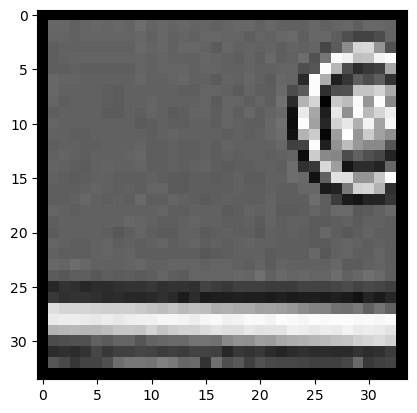

In [55]:
car_frame, no_pad = ICV_window(car,32)
plt.imshow(car_frame[24], cmap= plt.cm.gray)

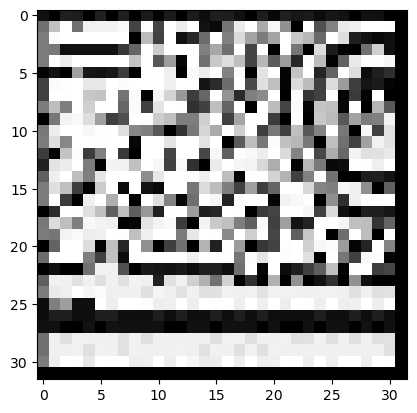

In [29]:
local_descriptor3= ICV_LBP_out(car_frame[24],no_pad,32)
plt.imshow(local_descriptor3, cmap=plt.cm.gray)

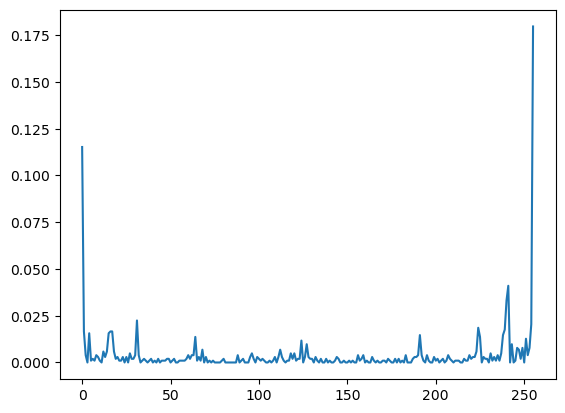

In [30]:
histogram2 = ICV_hist2(local_descriptor3,256)/np.sum(ICV_hist2(local_descriptor3,256))
plt.plot(histogram2)

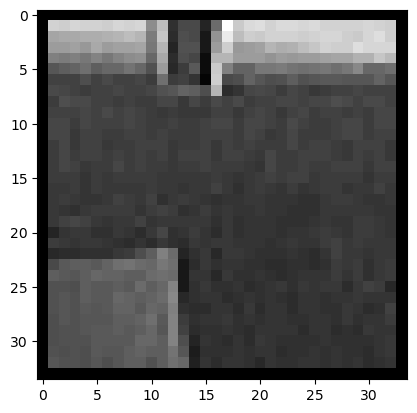

In [119]:
plt.imshow(car_frame[48], cmap= plt.cm.gray)

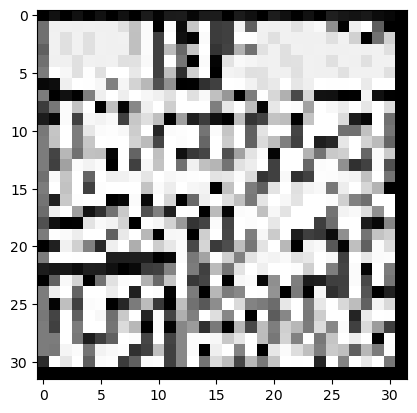

In [120]:
local_descriptor2= ICV_LBP_out(car_frame[48],no_pad,32)
plt.imshow(local_descriptor2, cmap=plt.cm.gray)
                                               

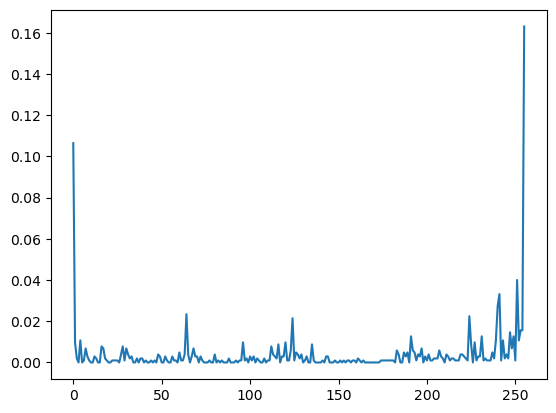

In [32]:
histogram1 = ICV_hist2(local_descriptor2,256)/np.sum(ICV_hist2(local_descriptor2,256))
plt.plot(histogram1)

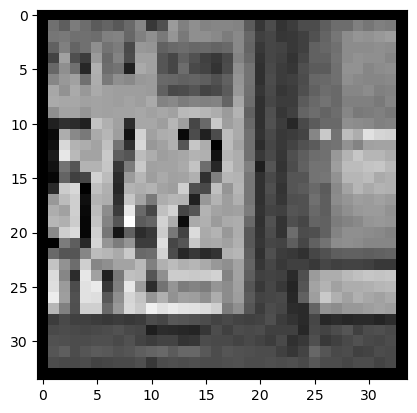

In [23]:
plt.imshow(car_frame[32], cmap= plt.cm.gray)

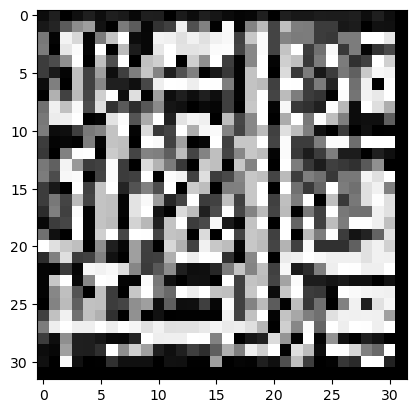

In [33]:
local_descriptor1= ICV_LBP_out(car_frame[32],no_pad,32)
plt.imshow(local_descriptor1, cmap=plt.cm.gray)
                                                

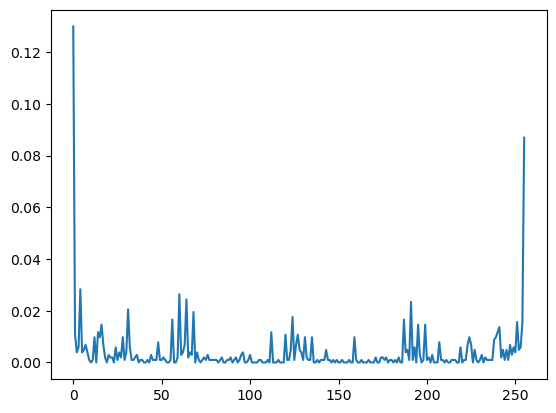

In [34]:
histogram = ICV_hist2(local_descriptor1,256)/np.sum(ICV_hist2(local_descriptor1,256))
plt.plot(histogram)

(12544,)


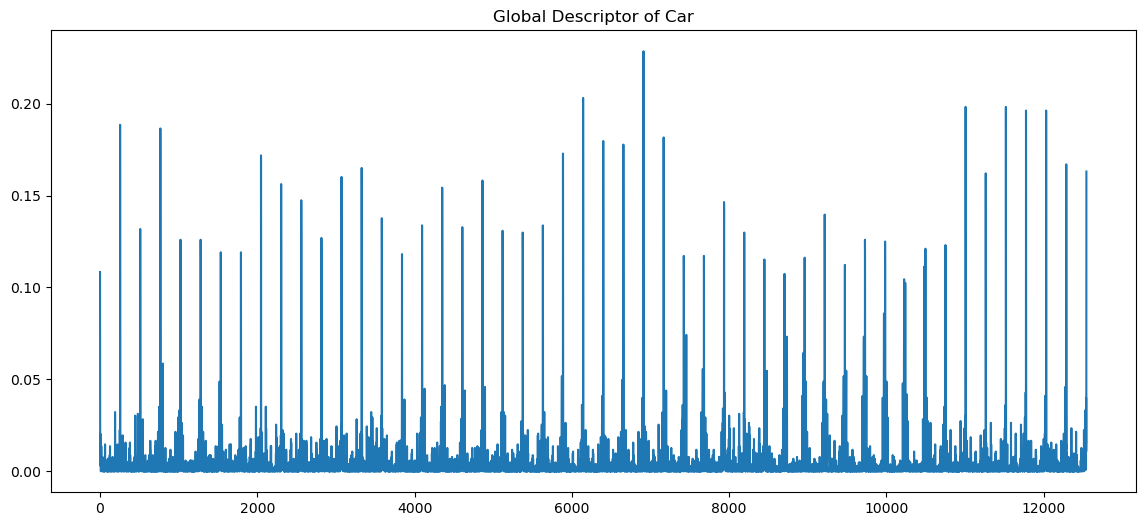

In [35]:
windows,img_nopad = ICV_window(car,32)
arr = []
for v in range(len(windows)):
    res = ICV_LBP_out(windows[v],img_nopad,32)
    win_hist=ICV_hist2(res,256)/np.sum(ICV_hist2(res,256))
    arr.append(win_hist)
           

arr1 = np.array(arr)
arr_global =np.concatenate(arr1, axis=0)
print(arr_global.shape)
    
# plot1 = (ICV_hist2(np.concatenate(arr, axis=0),256))/np.sum(ICV_hist2(np.concatenate(arr, axis=0),256)) #Normalized histogram
plt.figure(figsize=(14,6))
plt.title("Global Descriptor of Car")
plt.plot(arr_global)
plt.show()
   

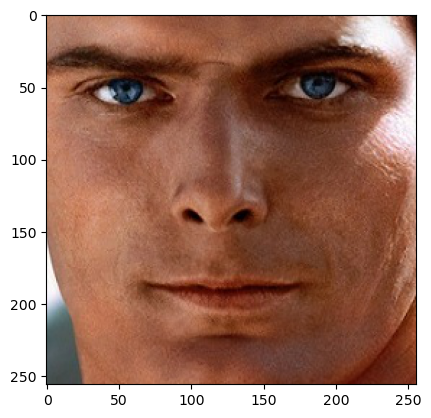

In [36]:
img = plt.imread('face-1.jpg')
plt.imshow(img)

(256, 256)


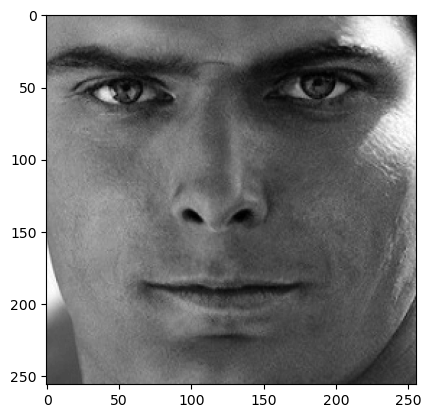

In [37]:
face= ICV_rgb2gray(img)
print(face.shape)
plt.imshow(face, cmap = plt.cm.gray) 


(12544,)


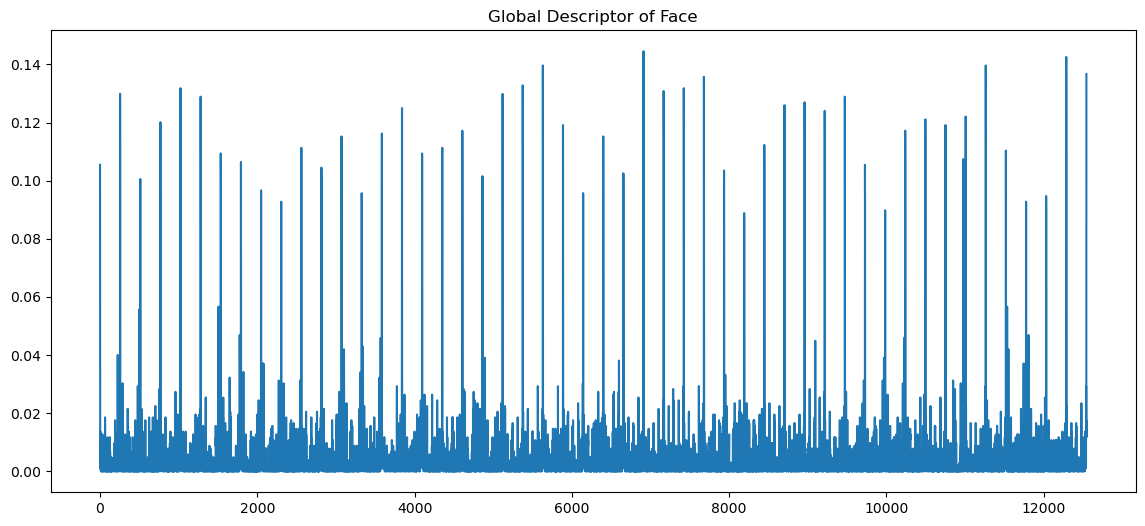

In [135]:
windows1,img_nopad1 = ICV_window(face,32)
arr = []
for v in range(len(windows1)):
    res = ICV_LBP_out(windows1[v],img_nopad1,32)
    win_hist=ICV_hist2(res,256)/np.sum(ICV_hist2(res,256))
    arr.append(win_hist)
           

arr1 = np.array(arr)
arr_global_face =np.concatenate(arr1, axis=0)
print(arr_global_face.shape)
    
# plot1 = (ICV_hist2(np.concatenate(arr, axis=0),256))/np.sum(ICV_hist2(np.concatenate(arr, axis=0),256)) #Normalized histogram
plt.figure(figsize=(14,6))
plt.title("Global Descriptor of Face")
plt.plot(arr_global_face)
plt.show()

Text(0.5, 1.0, 'Face')

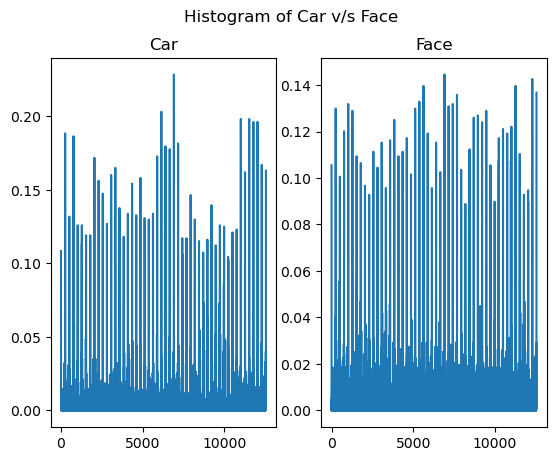

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram of Car v/s Face')
ax1.plot(arr_global)
ax1.set_title("Car")
ax2.plot(arr_global_face)
ax2.set_title("Face")

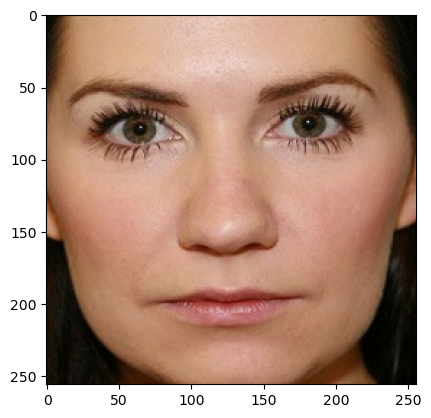

In [43]:
img = plt.imread('face-2.jpg')
plt.imshow(img)

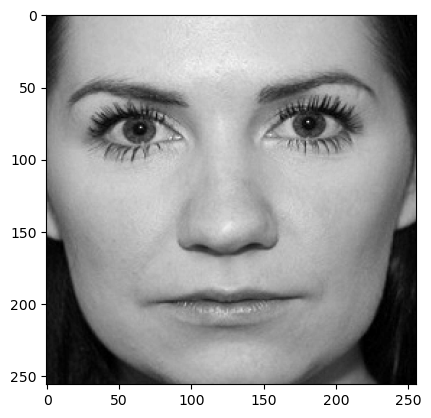

In [44]:
face2= ICV_rgb2gray(img)

plt.imshow(face2, cmap = plt.cm.gray) 

(12544,)


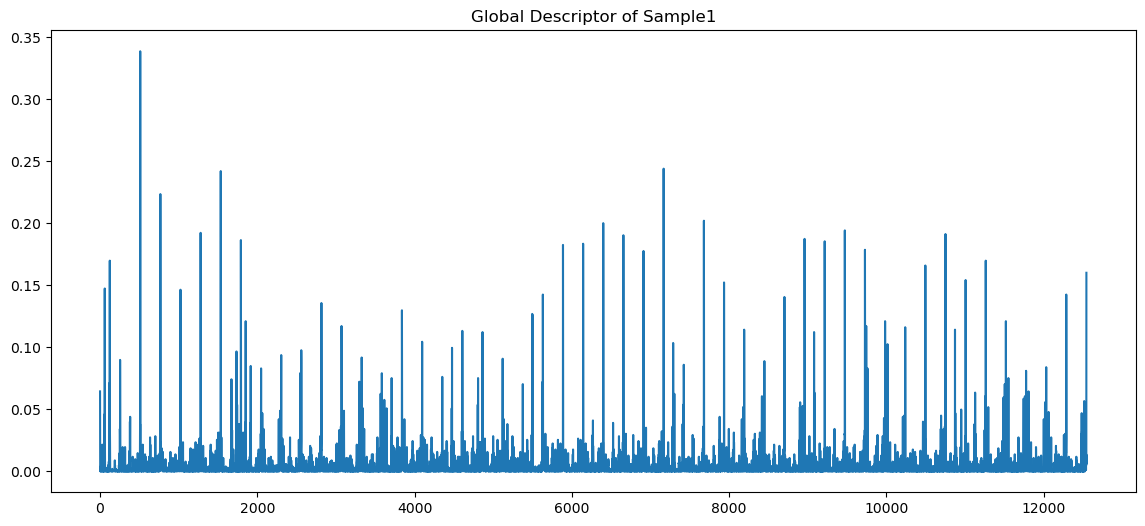

In [45]:
windows2,img_nopad1 = ICV_window(face2,32)
arr = []
for v in range(len(windows2)):
    res = ICV_LBP_out(windows2[v],img_nopad1,32)
    win_hist=ICV_hist2(res,256)/np.sum(ICV_hist2(res,256))
    arr.append(win_hist)
           

arr1 = np.array(arr)
arr_global_face_1 =np.concatenate(arr1, axis=0)
print(arr_global_face_1.shape)
    
# plot1 = (ICV_hist2(np.concatenate(arr, axis=0),256))/np.sum(ICV_hist2(np.concatenate(arr, axis=0),256)) #Normalized histogram
plt.figure(figsize=(14,6))
plt.title("Global Descriptor of Sample1")
plt.plot(arr_global_face_1)
plt.show()

Text(0.5, 1.0, 'Face')

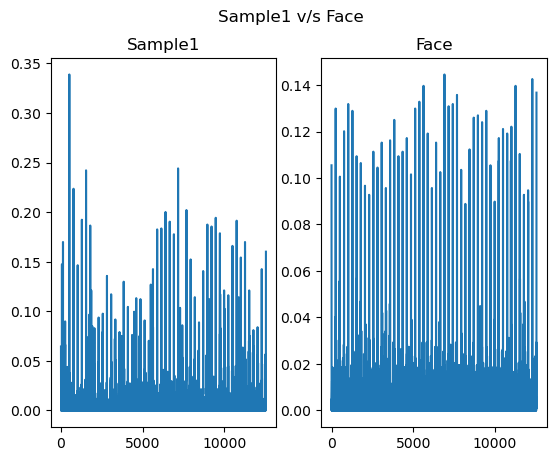

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sample1 v/s Face')
ax1.plot(arr_global_face_1)
ax1.set_title("Sample1")
ax2.plot(arr_global_face)
ax2.set_title("Face")

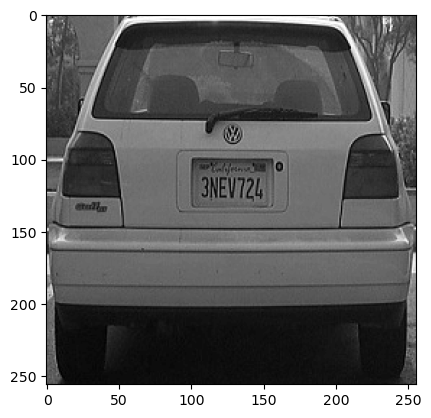

In [47]:
img = plt.imread('car-2.jpg')
car2= ICV_rgb2gray(img)

plt.imshow(car2, cmap = plt.cm.gray) 

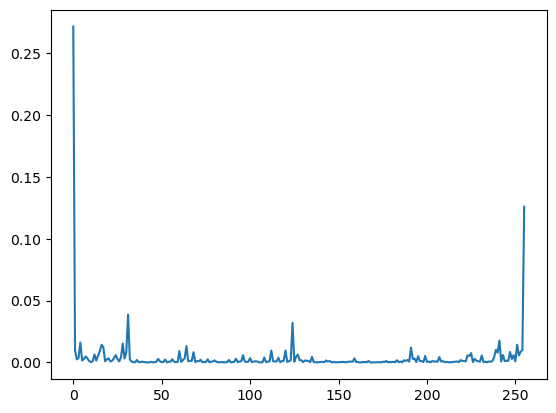

In [48]:
windows, no_pad = ICV_window(car2,8)
arr3 = []
for v in range(len(windows)):
    res = ICV_LBP_out(windows[v],no_pad,8)
    arr3.append(res)
arr3 = np.array(arr3)
car2hist_1 = ICV_hist2(np.concatenate(arr3, axis=0),256)/np.sum(ICV_hist2(np.concatenate(arr3, axis=0),256))

plt.plot(car2hist_1)

(12544,)


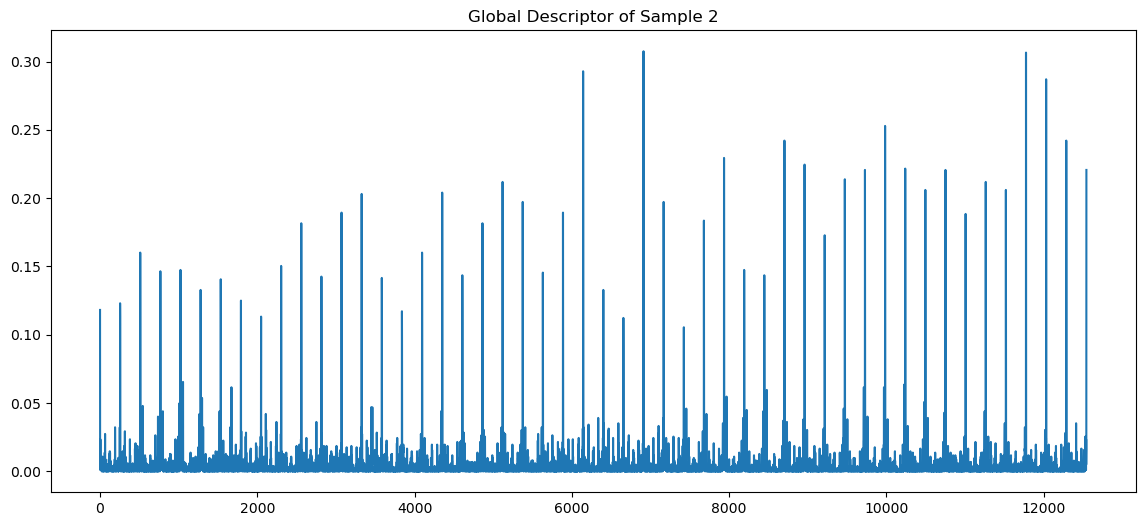

In [49]:
windows3,img_nopad2 = ICV_window(car2,32)
arr = []
for v in range(len(windows3)):
    res = ICV_LBP_out(windows3[v],img_nopad2,32)
    win_hist=ICV_hist2(res,256)/np.sum(ICV_hist2(res,256))
    arr.append(win_hist)
           

arr3 = np.array(arr)
arr_global_car_1 =np.concatenate(arr3, axis=0)
print(arr_global_car_1.shape)
    
# plot1 = (ICV_hist2(np.concatenate(arr, axis=0),256))/np.sum(ICV_hist2(np.concatenate(arr, axis=0),256)) #Normalized histogram
plt.figure(figsize=(14,6))
plt.title("Global Descriptor of Sample 2")
plt.plot(arr_global_car_1)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sample 2 v/s Car')
ax1.plot(arr_global_car_1)
ax1.set_title("Sample")
ax2.plot(arr_global)
ax2.set_title("Car")

### Question 4 b) Classifier for Face v/s Non-Face

In [113]:
from numpy.linalg import norm

In [89]:
def ICV_cosine(Hist_label, Hist_sample):
    
    cosine_similarity = np.dot(Hist_label,Hist_sample)/(norm(Hist_sample)*norm(Hist_label))
    return cosine_similarity

In [110]:
ICV_cosine(arr_global_face, arr_global_car_1)

0.86330282070135

In [149]:
def ICV_chi2_distance(hist_label, hist_sample, ep = 1e-10):

    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + ep)
        for (a, b) in zip(hist_label, hist_sample)])
    return d

In [150]:
ICV_chi2_distance(arr_global_face,arr_global_face_1)

10.97465971571592

#### This classifier takes input the Given Histogram/Global Descriptor of the face image and compares it with the sample and classifies

In [117]:
def ICV_classification(Hist_label, Hist_sample):   
    cos_sim = ICV_cosine(Hist_label, Hist_sample)
    chi2_dist = ICV_chi2_distance(Hist_label,Hist_sample)
    
    if cos_sim >= 0.81 and chi2_dist <= 11:
        print("This sample belongs to the class Face")
    else:
        print("This sample is not a Face")

In [136]:
ICV_classification(arr_global_face, arr_global_face_1)

This sample belongs to the class Face


### Part c) & d)

##### With reduced window size

(57600,)


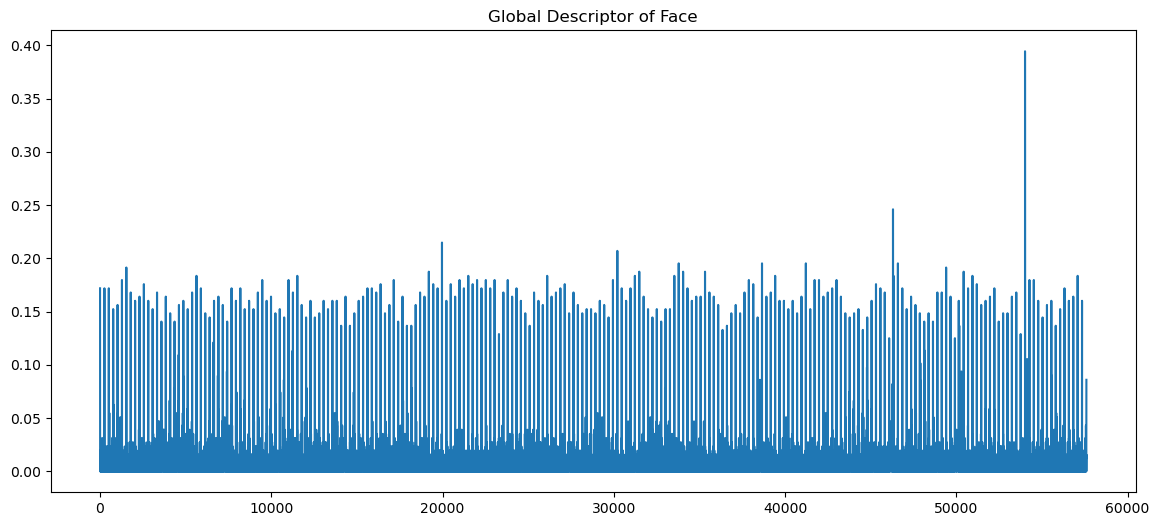

In [140]:
windows1,img_nopad1 = ICV_window(face,16)
arr = []
for v in range(len(windows1)):
    res = ICV_LBP_out(windows1[v],img_nopad1,16)
    win_hist=ICV_hist2(res,256)/np.sum(ICV_hist2(res,256))
    arr.append(win_hist)
           

arr1 = np.array(arr)
arr_global_face_small =np.concatenate(arr1, axis=0)
print(arr_global_face_small.shape)
    
# plot1 = (ICV_hist2(np.concatenate(arr, axis=0),256))/np.sum(ICV_hist2(np.concatenate(arr, axis=0),256)) #Normalized histogram
plt.figure(figsize=(14,6))
plt.title("Global Descriptor of Face")
plt.plot(arr_global_face_small)
plt.show()

(57600,)


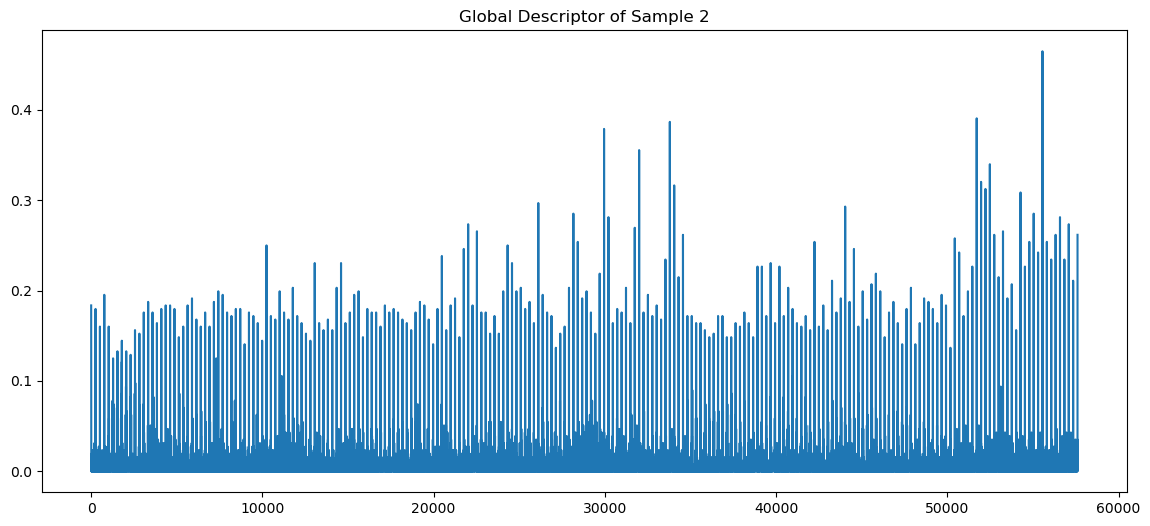

In [141]:
windows3,img_nopad2 = ICV_window(car2,16)
arr = []
for v in range(len(windows3)):
    res = ICV_LBP_out(windows3[v],img_nopad2,16)
    win_hist=ICV_hist2(res,256)/np.sum(ICV_hist2(res,256))
    arr.append(win_hist)
           

arr3 = np.array(arr)
arr_global_car_small =np.concatenate(arr3, axis=0)
print(arr_global_car_small.shape)
    
# plot1 = (ICV_hist2(np.concatenate(arr, axis=0),256))/np.sum(ICV_hist2(np.concatenate(arr, axis=0),256)) #Normalized histogram
plt.figure(figsize=(14,6))
plt.title("Global Descriptor of Sample 2")
plt.plot(arr_global_car_small)
plt.show()

In [142]:
ICV_classification(arr_global_face_small, arr_global_car_small)

This sample is not a Face


##### With bigger window size

(2304,)


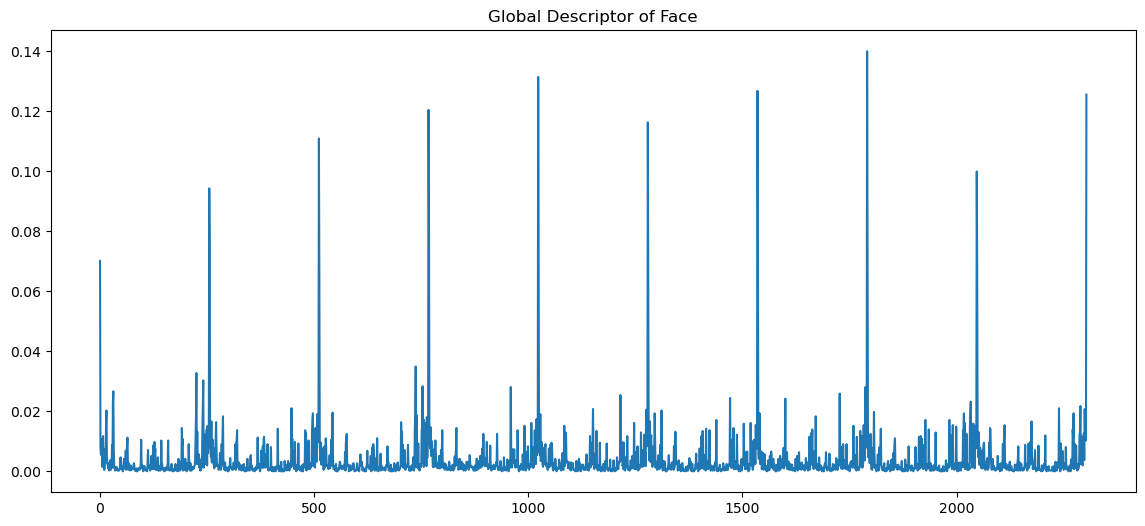

In [156]:
windows1,img_nopad1 = ICV_window(face,64)
arr = []
for v in range(len(windows1)):
    res = ICV_LBP_out(windows1[v],img_nopad1,64)
    win_hist=ICV_hist2(res,256)/np.sum(ICV_hist2(res,256))
    arr.append(win_hist)
           

arr1 = np.array(arr)
arr_global_face_big =np.concatenate(arr1, axis=0)
print(arr_global_face_big.shape)
    
# plot1 = (ICV_hist2(np.concatenate(arr, axis=0),256))/np.sum(ICV_hist2(np.concatenate(arr, axis=0),256)) #Normalized histogram
plt.figure(figsize=(14,6))
plt.title("Global Descriptor of Face")
plt.plot(arr_global_face_big)
plt.show()

(2304,)


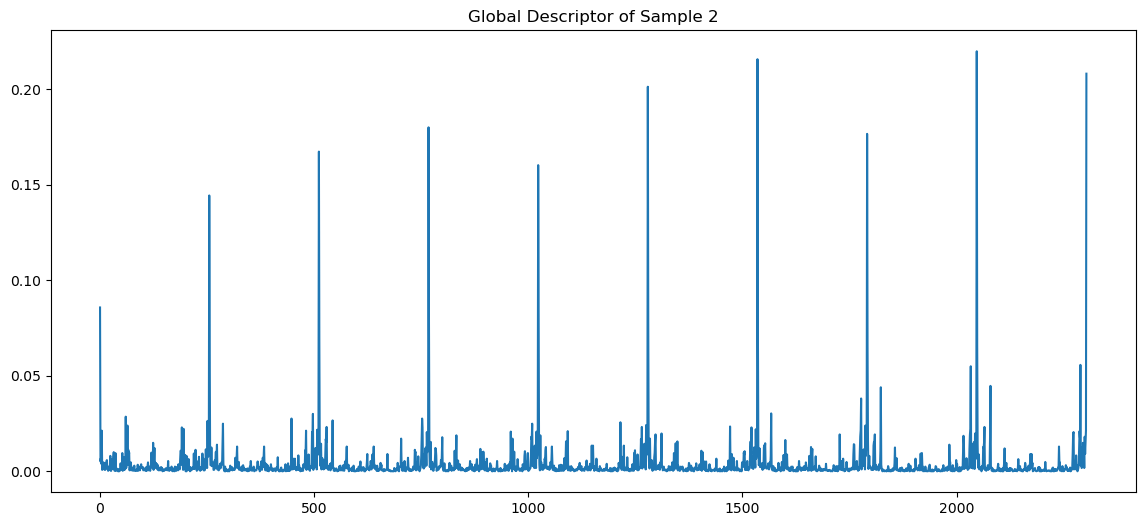

In [157]:
windows3,img_nopad2 = ICV_window(car2,64)
arr = []
for v in range(len(windows3)):
    res = ICV_LBP_out(windows3[v],img_nopad2,64)
    win_hist=ICV_hist2(res,256)/np.sum(ICV_hist2(res,256))
    arr.append(win_hist)
           

arr3 = np.array(arr)
arr_global_car_big =np.concatenate(arr3, axis=0)
print(arr_global_car_big.shape)
    
# plot1 = (ICV_hist2(np.concatenate(arr, axis=0),256))/np.sum(ICV_hist2(np.concatenate(arr, axis=0),256)) #Normalized histogram
plt.figure(figsize=(14,6))
plt.title("Global Descriptor of Sample 2")
plt.plot(arr_global_car_big)
plt.show()

In [158]:
ICV_classification(arr_global_face_big, arr_global_car_big)

This sample belongs to the class Face


In [159]:
ICV_cosine(arr_global_face_big, arr_global_car_big)

0.926586914162126

In [160]:
ICV_chi2_distance(arr_global_face_big,arr_global_car_big)

0.9936021344656509